In [9]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
import os
os.listdir("./Landsat8/")

['LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif',
 'LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif']

In [11]:
band4 = rasterio.open('./Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif') # red
band5 = rasterio.open('./Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif') # nir

In [12]:
print(f"rows: {band4.height}")
print(f"cols: {band4.width}")

rows: 1338
cols: 2107


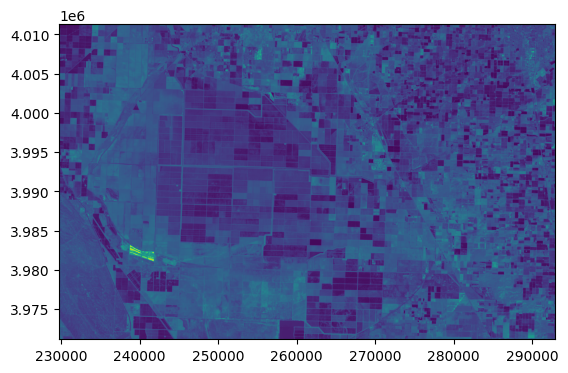

<AxesSubplot: >

In [13]:
plot.show(band4)

In [17]:
print(band4.dtypes[0])
print(band4.crs)
print(band4.transform)

uint16
EPSG:32611
| 30.00, 0.00, 229755.00|
| 0.00,-30.00, 4011285.00|
| 0.00, 0.00, 1.00|


In [18]:
band4.read(1)

array([[ 7479,  7474,  7472, ...,  8970,  9186,  9849],
       [ 7482,  7488,  7477, ...,  9048,  9151,  9667],
       [ 7497,  7468,  7454, ...,  9115,  9150, 10156],
       ...,
       [17295, 16415, 16222, ..., 11569, 11376, 11254],
       [17162, 16303, 15322, ..., 11617, 11278, 11115],
       [16905, 16026, 15720, ..., 12508, 12893, 13168]], dtype=uint16)

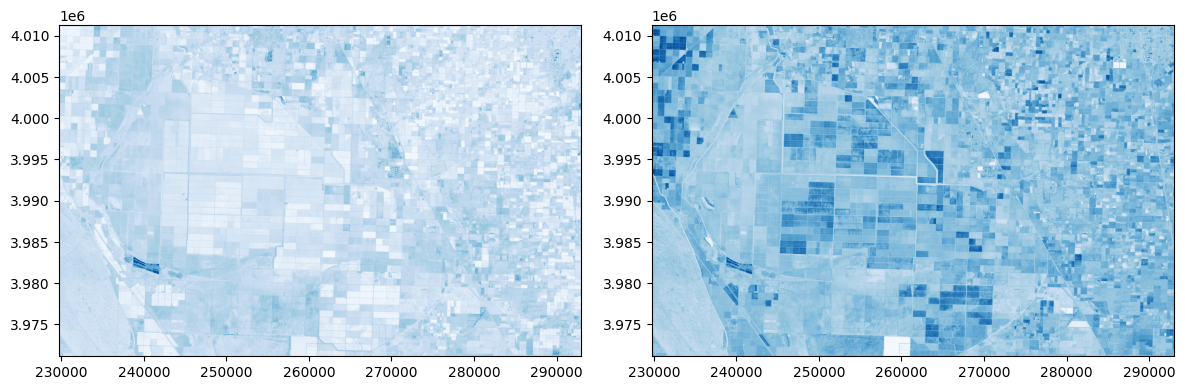

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax = ax1, cmap= "Blues") #red
plot.show(band5, ax = ax2, cmap= "Blues") #nir
fig.tight_layout()

In [20]:
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')
red

array([[ 7479.,  7474.,  7472., ...,  8970.,  9186.,  9849.],
       [ 7482.,  7488.,  7477., ...,  9048.,  9151.,  9667.],
       [ 7497.,  7468.,  7454., ...,  9115.,  9150., 10156.],
       ...,
       [17295., 16415., 16222., ..., 11569., 11376., 11254.],
       [17162., 16303., 15322., ..., 11617., 11278., 11115.],
       [16905., 16026., 15720., ..., 12508., 12893., 13168.]])

In Landsat 4-7, NDVI = (Band 4 – Band 3) / (Band 4 + Band 3). In Landsat 8-9, NDVI = (Band 5 – Band 4) / (Band 5 + Band 4)

In [21]:
ndvi = np.where(
    (nir+red) == 0.,
    0,
    (nir-red)/(nir+red)
)
ndvi

array([[0.52601559, 0.525987  , 0.5271335 , ..., 0.04151306, 0.05381882,
        0.06373877],
       [0.52721873, 0.52758588, 0.52751975, ..., 0.04496517, 0.04850533,
        0.05788909],
       [0.52774803, 0.53187488, 0.52999779, ..., 0.04178712, 0.04831244,
        0.06602906],
       ...,
       [0.1105454 , 0.11332577, 0.11401185, ..., 0.27119819, 0.27566776,
        0.2792135 ],
       [0.11084631, 0.1142081 , 0.11648022, ..., 0.2695089 , 0.27830038,
        0.28419629],
       [0.10991181, 0.12335211, 0.12403878, ..., 0.24283423, 0.23340369,
        0.22729807]])

In [22]:
ndviImage = rasterio.open("./Output/ndviImage.tiff", 'w', driver="Gtiff",
                          width=band4.width, height = band4.height,
                          count =1,
                          crs = band4.crs,
                          transform = band4.transform,
                          dtype = 'float64'
                          )
ndviImage.write(ndvi,1)
ndviImage.close()

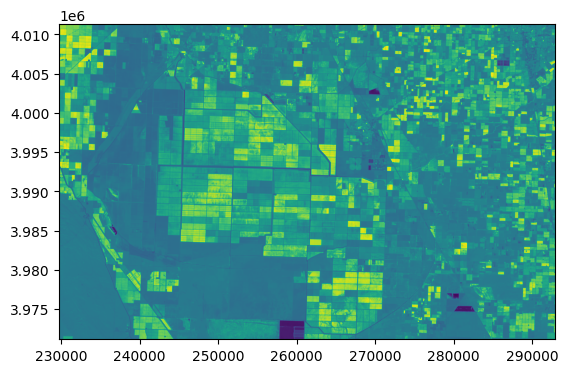

<AxesSubplot: >

In [23]:
ndvi = rasterio.open('./Output/ndviImage.tiff')
plot.show(ndvi)